# <b>MMD Summer 2020 Final Project</b>              
### <b>Erick Wan</b>
# <b>Title : What’s Behind the Rise in World Life Expectancy…</b>

## <b> Introduction: </b>
## <b>There tries to understand some factors behind the rise in World Life Expectancy. We will look into some varialbes and identif the relationship between those with World Life Expectancy. The data will be gathered from various resources including data.worldbank.org.</B>

In [1]:
import pandas as pd
import numpy as np
import re

## <b> A) First, let's find the world life expectancy throughout years on records </B>

In [2]:
#dfw = pd.read_csv('API_SP.DYN.LE00.IN_DS2_en_csv_v2_1308162.csv', sep='\t\,', engine='python')
dfw = pd.read_csv('API_SP.DYN.LE00.IN_DS2_en_csv_v2_1308162_0.csv', sep='\t', engine='python')

In [3]:
dfw

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Last Updated Date,7/1/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Country Name,Country Code,1960.000,1961.000,1962.000,1963.000,1964.000,1965.000,1966.000,1967.000,...,2010.000,2011.00000,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.0
4,Aruba,ABW,65.662,66.074,66.444,66.787,67.113,67.435,67.762,68.095,...,75.017,75.15800,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.900,70.14878,70.497561,70.797561,71.097561,71.346341,71.646341,71.946341,72.195122,NaN
264,"Yemen, Rep.",YEM,29.919,30.163,30.500,30.943,31.501,32.175,32.960,33.836,...,65.549,65.76800,65.920000,66.016000,66.066000,66.085000,66.087000,66.086000,66.096000,NaN
265,South Africa,ZAF,48.406,48.777,49.142,49.509,49.888,50.284,50.705,51.148,...,57.669,58.89500,60.060000,61.099000,61.968000,62.649000,63.153000,63.538000,63.857000,NaN
266,Zambia,ZMB,46.687,47.084,47.446,47.772,48.068,48.351,48.643,48.960,...,55.655,57.12600,58.502000,59.746000,60.831000,61.737000,62.464000,63.043000,63.510000,NaN


In [4]:
dfw.iloc[3,2:] = dfw.iloc[3, 2:].apply(str).replace('\.0', '', regex=True)

In [5]:
dfw.columns = dfw.iloc[3]

In [6]:
dfw

3,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Last Updated Date,7/1/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
4,Aruba,ABW,65.662,66.074,66.444,66.787,67.113,67.435,67.762,68.095,...,75.017,75.158,75.299,75.441,75.583,75.725,75.868,76.01,76.152,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.9,70.1488,70.4976,70.7976,71.0976,71.3463,71.6463,71.9463,72.1951,NaN
264,"Yemen, Rep.",YEM,29.919,30.163,30.5,30.943,31.501,32.175,32.96,33.836,...,65.549,65.768,65.92,66.016,66.066,66.085,66.087,66.086,66.096,NaN
265,South Africa,ZAF,48.406,48.777,49.142,49.509,49.888,50.284,50.705,51.148,...,57.669,58.895,60.06,61.099,61.968,62.649,63.153,63.538,63.857,NaN
266,Zambia,ZMB,46.687,47.084,47.446,47.772,48.068,48.351,48.643,48.96,...,55.655,57.126,58.502,59.746,60.831,61.737,62.464,63.043,63.51,NaN


In [7]:
cols = ['Year', 'Life_Exp']
idx = range(int(len(dfw.iloc[0, 2:])))
df_le = pd.DataFrame(columns = cols, index = idx)

In [8]:
i = 0
for j in range(0, len(dfw.iloc[3,2:]), 1):
    df_le.iloc[i, :] = [dfw.iloc[3, 2+i], dfw.iloc[4:, 2+i].mean()]
    i += 1

In [9]:
dfw = dfw.iloc[4:]

In [10]:
dfw.columns

Index(['Country Name', 'Country Code', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019'],
      dtype='object', name=3)

In [11]:
dfw.reset_index(drop=True, inplace=True)

In [12]:
dfw

3,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,65.662,66.074,66.444,66.787,67.113,67.435,67.762,68.095,...,75.017,75.158,75.299,75.441,75.583,75.725,75.868,76.01,76.152,NaN
1,Afghanistan,AFG,32.446,32.962,33.471,33.971,34.463,34.948,35.43,35.914,...,61.028,61.553,62.054,62.525,62.966,63.377,63.763,64.13,64.486,NaN
2,Angola,AGO,37.524,37.811,38.113,38.43,38.76,39.102,39.454,39.813,...,55.35,56.33,57.236,58.054,58.776,59.398,59.925,60.379,60.782,NaN
3,Albania,ALB,62.283,63.301,64.19,64.914,65.463,65.85,66.11,66.304,...,76.562,76.914,77.252,77.554,77.813,78.025,78.194,78.333,78.458,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.9,70.1488,70.4976,70.7976,71.0976,71.3463,71.6463,71.9463,72.1951,NaN
260,"Yemen, Rep.",YEM,29.919,30.163,30.5,30.943,31.501,32.175,32.96,33.836,...,65.549,65.768,65.92,66.016,66.066,66.085,66.087,66.086,66.096,NaN
261,South Africa,ZAF,48.406,48.777,49.142,49.509,49.888,50.284,50.705,51.148,...,57.669,58.895,60.06,61.099,61.968,62.649,63.153,63.538,63.857,NaN
262,Zambia,ZMB,46.687,47.084,47.446,47.772,48.068,48.351,48.643,48.96,...,55.655,57.126,58.502,59.746,60.831,61.737,62.464,63.043,63.51,NaN


## <b> This is the table of the world life expectancy throughout years on records. In general, starting from 1960 being tracked, you can see a rising pattern in general. The late data point available is in 2018. </B>

In [13]:
df_le

,Year,Life_Exp
0,1960,53.378
1,1961,53.9299
2,1962,54.3207
3,1963,54.695
4,1964,55.1822
5,1965,55.6646
6,1966,56.1267
7,1967,56.5479
8,1968,56.9409
9,1969,57.3216


## <b> B) Let's identify some variables which may contribute to the rise of world life expectancy. </b>
## <b> First variable to look at is world GPD. </B>

In [14]:
dfg = pd.read_csv('gdplev.csv', sep='\t', engine='python')

In [15]:
dfg 

,",""Current-Dollar and """"Real"""" Gross Domestic Product"",,,,,,30-Jul-20"
0,",,,,,,,"
1,"Annual,,,,Quarterly,,,"
2,",,,, (Seasonally adjusted annual rates),,,"
3,",,,,,,,"
4,",GDP in billions of current dollars,GDP in bil..."
...,...
296,",,,,2019Q2,""21,329.9"",""19,020.6"","
297,",,,,2019Q3,""21,540.3"",""19,141.7"","
298,",,,,2019Q4,""21,747.4"",""19,254.0"","
299,",,,,2020Q1,""21,561.1"",""19,010.8"","


In [16]:
cols = ['Year', 'GDP']
idx = range(len(dfg))
df_gdp = pd.DataFrame(columns = cols, index = idx)

In [17]:
dfg = dfg.iloc[7:, :]

In [18]:
i = 0
for i in range(len(dfg)):
    df_gdp.iloc[i, :] = re.split(',,', dfg.iloc[i, 0])[:2]

In [19]:
i = 0
for i in range(len(dfg)):
    df_gdp.iloc[i, :] = re.split(',\"+', df_gdp.iloc[i, 0])[:2]

In [20]:
i = 0
for i in range(len(dfg)):
    if (df_gdp.iloc[i, 0].find(',') != -1): 
        df_gdp.iloc[i, :] = re.split(',', dfg.iloc[i, 0])[:2]

In [21]:
df_gdp.iloc[0:45,:]

,Year,GDP
0,1929,104.6
1,1930,92.2
2,1931,77.4
3,1932,59.5
4,1933,57.2
5,1934,66.8
6,1935,74.2
7,1936,84.8
8,1937,93.0
9,1938,87.4


In [22]:
df_gdp.GDP = df_gdp.GDP.apply(str).replace('\"', '', regex=True)

In [23]:
df_gdp.GDP = df_gdp.GDP.apply(str).replace(',', '', regex=True)

In [24]:
df_gdp = df_gdp.dropna()

In [25]:
df_le_gdp = df_le.merge(df_gdp, how='inner', left_on='Year', right_on='Year' )


In [26]:
df_le_gdp['Life_Exp'] = df_le_gdp['Life_Exp'].astype(float).round(1)

In [27]:
df_le_gdp['GDP'] = df_le_gdp['GDP'].astype(float)

## <b> Below is the table containing the world life expectancy and GDP throughout years on records. The GDP was tracked dated back 1929. However, according to databank.org, the data for life expectancy were not available until 1960. </B>
## <b> The values of world GDP can be up and down in some years. But in general, there can see up trend patterns.</B>

In [28]:
df_le_gdp

,Year,Life_Exp,GDP
0,1960,53.4,542.4
1,1961,53.9,562.2
2,1962,54.3,603.9
3,1963,54.7,637.5
4,1964,55.2,684.5
5,1965,55.7,742.3
6,1966,56.1,813.4
7,1967,56.5,860.0
8,1968,56.9,940.7
9,1969,57.3,1017.6


In [29]:
df_le_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      60 non-null     object 
 1   Life_Exp  59 non-null     float64
 2   GDP       60 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.9+ KB


## <b> C) Next, let's add another variable, inflation rate (annual %), to the table. </B>
### <b> The data gathered need even more cleaning.</B>

In [30]:
rm_quote = lambda x: x.replace('"', '')
rm_comma = lambda x: x.replace(',', '')
#dfi = pd.read_csv('API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_1307380.csv', sep='\t', engine='python')
dfc_temp = pd.read_csv('API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_1307380.csv', sep='\t\,', engine='python')

In [31]:
dfc_temp

,"ï»¿""Data Source"",""World Development Indicators"","
0,"""Last Updated Date"",""2020-07-01"","
1,"""Country Name"",""Country Code"",""Indicator Name""..."
2,"""Aruba"",""ABW"",""Inflation, consumer prices (ann..."
3,"""Afghanistan"",""AFG"",""Inflation, consumer price..."
4,"""Angola"",""AGO"",""Inflation, consumer prices (an..."
...,...
261,"""Kosovo"",""XKX"",""Inflation, consumer prices (an..."
262,"""Yemen, Rep."",""YEM"",""Inflation, consumer price..."
263,"""South Africa"",""ZAF"",""Inflation, consumer pric..."
264,"""Zambia"",""ZMB"",""Inflation, consumer prices (an..."


In [32]:
cols = dfc_temp.iloc[1, 0].split('","')

In [33]:
idx = range(int(len(dfc_temp)))
dfc = pd.DataFrame(columns = cols, index = idx)

In [34]:
dfc.columns

Index(['"Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019",'],
      dtype='object')

In [35]:
dfc = dfc.rename(columns=rm_quote)
dfc = dfc.rename(columns=rm_comma)

In [36]:
dfc_temp = dfc_temp.iloc[2:, :]

In [37]:
i = 0
for i in range(len(dfc_temp)):
    dfc.iloc[i, :] = re.split('","', dfc_temp.iloc[i, 0])
    dfc.iloc[i, :] = dfc.iloc[i, :].str.replace(r"[\",]", '')

In [38]:
dfc = dfc.dropna()

In [39]:
dfc.iloc[:, 4:] = dfc.iloc[:, 4:].apply(pd.to_numeric)

In [40]:
dfc

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,Inflation consumer prices (annual %),FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.07814,4.3163,0.627472,-2.37207,0.421441,0.474764,-0.931196,-1.02828,3.62604,4.25746
1,Afghanistan,AFG,Inflation consumer prices (annual %),FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.17854,11.8042,6.44121,7.38577,4.674,-0.661709,4.38389,4.97595,0.626149,2.30237
2,Angola,AGO,Inflation consumer prices (annual %),FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-60.4964,13.4825,10.2779,8.77781,7.28039,-21.5317,32.3777,31.6917,20.1904,17.1453
3,Albania,ALB,Inflation consumer prices (annual %),FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,3.62234,3.42912,2.0316,1.93762,1.62587,1.89617,1.27543,1.98666,2.02806,1.41109
4,Andorra,AND,Inflation consumer prices (annual %),FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Inflation consumer prices (annual %),FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,3.48051,7.33642,2.47674,1.76732,0.428958,-0.536929,0.273169,1.48823,1.0538,2.67599
260,Yemen Rep.,YEM,Inflation consumer prices (annual %),FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,11.1748,19.5436,9.88539,10.9684,8.10473,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,Inflation consumer prices (annual %),FP.CPI.TOTL.ZG,1.28888,2.10234,1.24629,1.33797,2.53498,4.06902,...,4.06354,5.01716,5.72394,5.7764,6.13602,4.50921,6.5946,5.18108,4.50458,4.12435
262,Zambia,ZMB,Inflation consumer prices (annual %),FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,8.50176,6.4294,6.5759,6.97768,7.80688,10.1106,17.8697,6.57731,7.49457,9.15032


In [41]:
cols = ['Year', 'CPI']
idx = range(int(len(dfc.iloc[0, 4:])))
df_cpi = pd.DataFrame(columns = cols, index = idx)

In [42]:
i = 0
for j in range(0, len(dfc.iloc[0,4:]), 1):
    df_cpi.iloc[i, :] = [dfc.columns[4+i], dfc.iloc[:, 4+i].median()]
    i += 1

In [43]:
df_cpi

,Year,CPI
0,1960,1.95642
1,1961,2.10295
2,1962,2.66996
3,1963,2.89898
4,1964,3.32841
5,1965,3.41003
6,1966,3.83016
7,1967,3.02354
8,1968,3.16194
9,1969,3.38841


## <b> Though there can generate data for years before 1980, the worldbank.org chose not to present the data for whatever reasons. As such, to reflect the data legitamcy, there needs to remove some data rather taking into consideration.</B>

In [44]:
df_cpi[df_cpi['Year']=='1980']

,Year,CPI
20,1980,13.7063


In [45]:
df_cpi = df_cpi.iloc[20:, :]
df_cpi

,Year,CPI
20,1980,13.7063
21,1981,12.4925
22,1982,9.92273
23,1983,8.77115
24,1984,8.1164
25,1985,6.85681
26,1986,6.99277
27,1987,6.94331
28,1988,7.41277
29,1989,7.74089


## <b> We merge the inflation rate data to the overall table. </B>

In [46]:
df_le_gdp_cpi = df_le_gdp.merge(df_cpi, how='left', left_on='Year', right_on='Year' )

In [47]:
df_le_gdp_cpi['CPI'] = df_le_gdp_cpi['CPI'].astype(float)

In [48]:
df_le_gdp_cpi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      60 non-null     object 
 1   Life_Exp  59 non-null     float64
 2   GDP       60 non-null     float64
 3   CPI       40 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.3+ KB


## <b> Here is the table with the inflation rate data added. </B>
## <b> The inflation is an average number. We know some countries did not have inflation data tracked not until recent 10 years of so. There are a wide range of values of inflation numbers among different countries. For now, let's just put the data in the table for analysis later.  </B>

## <b> Note:  Inflation as measured by the consumer price index reflects the annual percentage change in the cost to the average consumer of acquiring a basket of goods and services that may be fixed or changed at specified intervals, such as yearly. The Laspeyres formula is generally used.</b>

In [49]:
df_le_gdp_cpi

,Year,Life_Exp,GDP,CPI
0,1960,53.4,542.4,NaN
1,1961,53.9,562.2,NaN
2,1962,54.3,603.9,NaN
3,1963,54.7,637.5,NaN
4,1964,55.2,684.5,NaN
5,1965,55.7,742.3,NaN
6,1966,56.1,813.4,NaN
7,1967,56.5,860.0,NaN
8,1968,56.9,940.7,NaN
9,1969,57.3,1017.6,NaN


## <b> D) Let's add another variable, World Poplulation, to the table. </B>
### <b> </B>

In [50]:
dfp_temp = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_1308146.csv', sep='\t\,', engine='python')

In [51]:
dfp_temp

,"ï»¿""Data Source"",""World Development Indicators"","
0,"""Last Updated Date"",""2020-07-01"","
1,"""Country Name"",""Country Code"",""Indicator Name""..."
2,"""Aruba"",""ABW"",""Population, total"",""SP.POP.TOTL..."
3,"""Afghanistan"",""AFG"",""Population, total"",""SP.PO..."
4,"""Angola"",""AGO"",""Population, total"",""SP.POP.TOT..."
...,...
261,"""Kosovo"",""XKX"",""Population, total"",""SP.POP.TOT..."
262,"""Yemen, Rep."",""YEM"",""Population, total"",""SP.PO..."
263,"""South Africa"",""ZAF"",""Population, total"",""SP.P..."
264,"""Zambia"",""ZMB"",""Population, total"",""SP.POP.TOT..."


In [52]:
cols = dfp_temp.iloc[1, 0].split('","')

In [53]:
idx = range(int(len(dfp_temp)))
dfp = pd.DataFrame(columns = cols, index = idx)

In [54]:
dfp.columns

Index(['"Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019",'],
      dtype='object')

In [55]:
rm_quote = lambda x: x.replace('"', '')
rm_comma = lambda x: x.replace(',', '')

In [56]:
dfp = dfp.rename(columns=rm_quote)
dfp = dfp.rename(columns=rm_comma)

In [57]:
dfp_temp = dfp_temp.iloc[2:, :]

In [58]:
i = 0
for i in range(len(dfp_temp)):
    dfp.iloc[i, :] = re.split('","', dfp_temp.iloc[i, 0])
    dfp.iloc[i, :] = dfp.iloc[i, :].str.replace(r"[\",]", '')

In [59]:
dfp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,Population total,SP.POP.TOTL,54211,55438,56225,56695,57032,57360,...,101669,102046,102560,103159,103774,104341,104872,105366,105845,106314
1,Afghanistan,AFG,Population total,SP.POP.TOTL,8996973,9169410,9351441,9543205,9744781,9956320,...,29185507,30117413,31161376,32269589,33370794,34413603,35383128,36296400,37172386,38041754
2,Angola,AGO,Population total,SP.POP.TOTL,5454933,5531472,5608539,5679458,5735044,5770570,...,23356246,24220661,25107931,26015780,26941779,27884381,28842484,29816748,30809762,31825295
3,Albania,ALB,Population total,SP.POP.TOTL,1608800,1659800,1711319,1762621,1814135,1864791,...,2913021,2905195,2900401,2895092,2889104,2880703,2876101,2873457,2866376,2854191
4,Andorra,AND,Population total,SP.POP.TOTL,13411,14375,15370,16412,17469,18549,...,84449,83747,82427,80774,79213,78011,77297,77001,77006,77142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,South Africa,ZAF,Population total,SP.POP.TOTL,17099840,17524533,17965725,18423161,18896307,19384841,...,51216964,52004172,52834005,53689236,54545991,55386367,56203654,57000451,57779622,58558270
262,Zambia,ZMB,Population total,SP.POP.TOTL,3070776,3164329,3260650,3360104,3463213,3570464,...,13605984,14023193,14465121,14926504,15399753,15879361,16363507,16853688,17351822,17861030
263,Zimbabwe,ZWE,Population total,SP.POP.TOTL,3776681,3905034,4039201,4178726,4322861,4471177,...,12697723,12894316,13115131,13350356,13586681,13814629,14030390,14236745,14439018,14645468
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
dfp = dfp.dropna()

In [61]:
dfp.iloc[:, 4:] = dfp.iloc[:, 4:].apply(pd.to_numeric)

C:\Users\EW\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\EW\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
cols = ['Year', 'POP']
idx = range(int(len(dfp.iloc[0, 4:])))
df_pop = pd.DataFrame(columns = cols, index = idx)

In [63]:
i = 0
for j in range(0, len(dfp.iloc[0,4:]), 1):
    df_pop.iloc[i, :] = [dfp.columns[4+i], dfp.iloc[:, 4+i].sum()]
    i += 1

In [64]:
df_pop

,Year,POP
0,1960,3.06632e+10
1,1961,3.10754e+10
2,1962,3.16263e+10
3,1963,3.23119e+10
4,1964,3.30029e+10
5,1965,3.37109e+10
6,1966,3.44564e+10
7,1967,3.5199e+10
8,1968,3.59555e+10
9,1969,3.67495e+10


## <b> We merge the world population data to the overall table. </B>

In [65]:
df_le_gdp_cpi_pop = df_le_gdp_cpi.merge(df_pop, how='inner', left_on='Year', right_on='Year' )

In [66]:
df_le_gdp_cpi_pop['POP'] = df_le_gdp_cpi_pop['POP'].astype(float)

In [67]:
df_le_gdp_cpi_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      60 non-null     object 
 1   Life_Exp  59 non-null     float64
 2   GDP       60 non-null     float64
 3   CPI       40 non-null     float64
 4   POP       60 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.8+ KB


## <b> Here is the table with the World Population data added. </B>
## <b> The population is a sum of the population of all countries. It accounts for all the countries from 1960 to 2019. There is a discrepancy of calculated population (e.g. in 2019 8.16B) with the total population from the graph in worldbank.org site (in 2019 7.67B). Since we add up the number available for every country when we do the calculation, the calculated number can be a more accurate one. In any case, the number is showing linear uptrend throughout the years.</B>

In [68]:
df_le_gdp_cpi_pop

,Year,Life_Exp,GDP,CPI,POP
0,1960,53.4,542.4,NaN,3.066317e+10
1,1961,53.9,562.2,NaN,3.107537e+10
2,1962,54.3,603.9,NaN,3.162627e+10
3,1963,54.7,637.5,NaN,3.231187e+10
4,1964,55.2,684.5,NaN,3.300286e+10
5,1965,55.7,742.3,NaN,3.371091e+10
6,1966,56.1,813.4,NaN,3.445637e+10
7,1967,56.5,860.0,NaN,3.519903e+10
8,1968,56.9,940.7,NaN,3.595548e+10
9,1969,57.3,1017.6,NaN,3.674947e+10


## <b> Using the population data, there also calculates a weight table of countries throughout the year in term of population. </B>

In [69]:
df_wt = dfp.copy()

In [70]:
df_wt.drop(['Indicator Name', 'Indicator Code'], axis=1, inplace=True)

In [71]:
df_wt

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,54211,55438,56225,56695,57032,57360,57715,58055,...,101669,102046,102560,103159,103774,104341,104872,105366,105845,106314
1,Afghanistan,AFG,8.99697e+06,9.16941e+06,9.35144e+06,9.54320e+06,9.74478e+06,9.95632e+06,1.01748e+07,1.03999e+07,...,2.91855e+07,3.01174e+07,3.11614e+07,3.22696e+07,3.33708e+07,3.44136e+07,3.53831e+07,3.62964e+07,3.71724e+07,3.80418e+07
2,Angola,AGO,5.45493e+06,5.53147e+06,5.60854e+06,5.67946e+06,5.73504e+06,5.77057e+06,5.78121e+06,5.77424e+06,...,2.33562e+07,2.42207e+07,2.51079e+07,2.60158e+07,2.69418e+07,2.78844e+07,2.88425e+07,2.98167e+07,3.08098e+07,3.18253e+07
3,Albania,ALB,1.6088e+06,1.6598e+06,1.71132e+06,1.76262e+06,1.81414e+06,1.86479e+06,1.91457e+06,1.9656e+06,...,2.91302e+06,2.9052e+06,2.9004e+06,2.89509e+06,2.8891e+06,2.8807e+06,2.8761e+06,2.87346e+06,2.86638e+06,2.85419e+06
4,Andorra,AND,13411,14375,15370,16412,17469,18549,19647,20758,...,84449,83747,82427,80774,79213,78011,77297,77001,77006,77142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,947000,966000,994000,1.022e+06,1.05e+06,1.078e+06,1.106e+06,1.135e+06,...,1.77568e+06,1.791e+06,1.80711e+06,1.81812e+06,1.81277e+06,1.7882e+06,1.77756e+06,1.791e+06,1.79708e+06,1.79425e+06
260,Yemen Rep.,YEM,5.31536e+06,5.39304e+06,5.47367e+06,5.55677e+06,5.6416e+06,5.72775e+06,5.81625e+06,5.90787e+06,...,2.31549e+07,2.38076e+07,2.44732e+07,2.51471e+07,2.58235e+07,2.64979e+07,2.71682e+07,2.78348e+07,2.84987e+07,2.91619e+07
261,South Africa,ZAF,1.70998e+07,1.75245e+07,1.79657e+07,1.84232e+07,1.88963e+07,1.93848e+07,1.98882e+07,2.04069e+07,...,5.1217e+07,5.20042e+07,5.2834e+07,5.36892e+07,5.4546e+07,5.53864e+07,5.62037e+07,5.70005e+07,5.77796e+07,5.85583e+07
262,Zambia,ZMB,3.07078e+06,3.16433e+06,3.26065e+06,3.3601e+06,3.46321e+06,3.57046e+06,3.68196e+06,3.79787e+06,...,1.3606e+07,1.40232e+07,1.44651e+07,1.49265e+07,1.53998e+07,1.58794e+07,1.63635e+07,1.68537e+07,1.73518e+07,1.7861e+07


In [72]:
df_wt.iloc[1,2]

8996973.0

In [73]:
df_pop.iloc[0,1]

30663173097.0

In [74]:
for i in range(len(df_pop)):
    for j in range(len(df_wt)):
        df_wt.iloc[j, i+2] = df_wt.iloc[j, i+2] / df_pop.iloc[i, 1] 

In [75]:
df_wt

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,1.76795e-06,1.78399e-06,1.77779e-06,1.75462e-06,1.72809e-06,1.70153e-06,1.67502e-06,1.64934e-06,...,1.39208e-06,1.37986e-06,1.36947e-06,1.36018e-06,1.35116e-06,1.34169e-06,1.33186e-06,1.32181e-06,1.3121e-06,1.30267e-06
1,Afghanistan,AFG,0.000293413,0.00029507,0.000295686,0.000295347,0.000295271,0.000295344,0.000295296,0.000295461,...,0.000399616,0.000407245,0.000416095,0.000425482,0.000434495,0.000442514,0.000449359,0.000455337,0.000460805,0.000466127
2,Angola,AGO,0.000177899,0.000178002,0.000177338,0.00017577,0.000173774,0.000171178,0.000167784,0.000164046,...,0.0003198,0.000327509,0.000335264,0.000343024,0.000350788,0.000358556,0.000366294,0.00037405,0.000381931,0.000389956
3,Albania,ALB,5.24668e-05,5.34121e-05,5.41107e-05,5.45503e-05,5.4969e-05,5.53171e-05,5.55651e-05,5.58424e-05,...,3.98859e-05,3.92838e-05,3.87288e-05,3.81725e-05,3.76168e-05,3.70421e-05,3.6526e-05,3.60474e-05,3.55328e-05,3.49725e-05
4,Andorra,AND,4.37365e-07,4.62585e-07,4.85988e-07,5.07925e-07,5.29318e-07,5.50237e-07,5.70199e-07,5.89732e-07,...,1.1563e-06,1.13242e-06,1.10064e-06,1.06502e-06,1.03137e-06,1.00312e-06,9.81658e-07,9.65974e-07,9.54599e-07,9.45223e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,3.0884e-05,3.10857e-05,3.14296e-05,3.16292e-05,3.18154e-05,3.19778e-05,3.20986e-05,3.22452e-05,...,2.43131e-05,2.42177e-05,2.41301e-05,2.39723e-05,2.36027e-05,2.29939e-05,2.25746e-05,2.24681e-05,2.22774e-05,2.1985e-05
260,Yemen Rep.,YEM,0.000173347,0.000173547,0.000173074,0.000171973,0.000170943,0.000169908,0.0001688,0.000167842,...,0.000317043,0.000321924,0.000326788,0.000331571,0.000336228,0.000340728,0.000345031,0.000349187,0.000353282,0.000357322
261,South Africa,ZAF,0.000557667,0.000563936,0.000568063,0.000570167,0.000572566,0.000575032,0.000577201,0.000579756,...,0.000701277,0.000703195,0.000705488,0.000707905,0.000710201,0.000712196,0.000713776,0.000715068,0.000716261,0.000717516
262,Zambia,ZMB,0.000100145,0.000101828,0.000103099,0.00010399,0.000104937,0.000105914,0.000106858,0.000107897,...,0.000186297,0.00018962,0.000193152,0.00019681,0.000200508,0.000204188,0.000207814,0.000211429,0.0002151,0.000218852


## <b> E) Let's add another variable, Military expenditure (% of GDP), to the table. </B>
### <b> </B>

In [76]:
dfm_temp = pd.read_csv('API_MS.MIL.XPND.GD.ZS_DS2_en_csv_v2_1307387.csv', sep='\t\,', engine='python')

In [77]:
dfm_temp

,"ï»¿""Data Source"",""World Development Indicators"","
0,"""Last Updated Date"",""2020-07-01"","
1,"""Country Name"",""Country Code"",""Indicator Name""..."
2,"""Aruba"",""ABW"",""Military expenditure (% of GDP)..."
3,"""Afghanistan"",""AFG"",""Military expenditure (% o..."
4,"""Angola"",""AGO"",""Military expenditure (% of GDP..."
...,...
261,"""Kosovo"",""XKX"",""Military expenditure (% of GDP..."
262,"""Yemen, Rep."",""YEM"",""Military expenditure (% o..."
263,"""South Africa"",""ZAF"",""Military expenditure (% ..."
264,"""Zambia"",""ZMB"",""Military expenditure (% of GDP..."


In [78]:
cols = dfm_temp.iloc[1, 0].split('","')

In [79]:
idx = range(int(len(dfm_temp)))
dfm = pd.DataFrame(columns = cols, index = idx)

In [80]:
dfm.columns

Index(['"Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019",'],
      dtype='object')

In [81]:
rm_quote = lambda x: x.replace('"', '')
rm_comma = lambda x: x.replace(',', '')

In [82]:
dfm = dfm.rename(columns=rm_quote)
dfm = dfm.rename(columns=rm_comma)

In [83]:
dfm_temp = dfm_temp.iloc[2:, :]

In [84]:
dfm_temp

,"ï»¿""Data Source"",""World Development Indicators"","
2,"""Aruba"",""ABW"",""Military expenditure (% of GDP)..."
3,"""Afghanistan"",""AFG"",""Military expenditure (% o..."
4,"""Angola"",""AGO"",""Military expenditure (% of GDP..."
5,"""Albania"",""ALB"",""Military expenditure (% of GD..."
6,"""Andorra"",""AND"",""Military expenditure (% of GD..."
...,...
261,"""Kosovo"",""XKX"",""Military expenditure (% of GDP..."
262,"""Yemen, Rep."",""YEM"",""Military expenditure (% o..."
263,"""South Africa"",""ZAF"",""Military expenditure (% ..."
264,"""Zambia"",""ZMB"",""Military expenditure (% of GDP..."


In [85]:
i = 0
for i in range(len(dfm_temp)):
    dfm.iloc[i, :] = re.split('","', dfm_temp.iloc[i, 0])
    dfm.iloc[i, :] = dfm.iloc[i, :].str.replace(r"[\",]", '')

In [86]:
dfm

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,,,,,,,...,,,,,,,,,,
1,Afghanistan,AFG,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,,,,,,,...,1.94583653549399,1.82134648454597,1.17541658160723,1.07694984690258,1.29801299872616,0.993454695099871,0.955493294290016,0.94396349195364,0.984560504130132,
2,Angola,AGO,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,,,,,,,...,4.17758478019843,3.25566030171388,3.2366594546399,4.45523927086343,4.69845451564414,3.10542625956692,2.73334072526982,2.42111283765097,1.77713755353982,
3,Albania,ALB,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,,,,,,,...,1.55859189302343,1.52826631112524,1.48708257655211,1.40898210141128,1.3465159912894,1.16230386432234,1.10150759652938,1.10755057254768,1.17890055828841,
4,Andorra,AND,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,South Africa,ZAF,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,0.950977129000048,1.46784913582076,2.25483730416399,2.06460848141164,2.695608797689,2.63082886060615,...,1.11580825092212,1.10325767555138,1.1327931119157,1.12327426203249,1.10943788284507,1.09918207478519,1.07552955178529,1.04366339589233,0.981709721430103,
262,Zambia,ZMB,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,,,,,,,...,1.38259276517524,1.31760682261636,1.35785191103278,1.3597391140583,1.63386849247204,1.7532341119123,1.42450435823473,1.30519975134762,1.40095005931668,
263,Zimbabwe,ZWE,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,,,,,,1.18956840018301,...,0.976401091105275,1.64383843463449,2.26393110917671,2.34308353534249,2.32473396346411,2.34362922540242,2.22072840945868,1.9301341465609,2.16960636324343,
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
dfm = dfm.dropna()

In [88]:
dfm.iloc[:, 4:] = dfm.iloc[:, 4:].apply(pd.to_numeric)

C:\Users\EW\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\EW\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [89]:
cols = ['Year', 'MIL']
idx = range(int(len(dfm.iloc[0, 4:])))
df_mil = pd.DataFrame(columns = cols, index = idx)

In [90]:
i = 0
for j in range(0, len(dfm.iloc[0,4:]), 1):
    df_mil.iloc[i, :] = [dfm.columns[4+i], dfm.iloc[:, 4+i].mean()]
    i += 1

In [91]:
df_mil

,Year,MIL
0,1960,3.5012
1,1961,3.25673
2,1962,3.44638
3,1963,3.26493
4,1964,3.22595
5,1965,3.31879
6,1966,3.33216
7,1967,3.63203
8,1968,3.58495
9,1969,3.62286


## <b> We merge the Military Expenditure data to the overall table. </B>

In [92]:
df_le_gdp_cpi_pop_mil = df_le_gdp_cpi_pop.merge(df_mil, how='right', left_on='Year', right_on='Year' )

In [93]:
df_le_gdp_cpi_pop_mil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      60 non-null     object 
 1   Life_Exp  59 non-null     float64
 2   GDP       60 non-null     float64
 3   CPI       40 non-null     float64
 4   POP       60 non-null     float64
 5   MIL       59 non-null     object 
dtypes: float64(4), object(2)
memory usage: 3.3+ KB


In [94]:
df_le_gdp_cpi_pop_mil['MIL'] = df_le_gdp_cpi_pop_mil['MIL'].astype(float)

In [95]:
df_le_gdp_cpi_pop_mil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      60 non-null     object 
 1   Life_Exp  59 non-null     float64
 2   GDP       60 non-null     float64
 3   CPI       40 non-null     float64
 4   POP       60 non-null     float64
 5   MIL       59 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.3+ KB


## <b> Here is the updated table with the Military Expenditure data added. </B>
## <b> The Military Expenditure is a mean of % of GDP spent on military of the countries being accounted. The expense includes all current and capital expenditures on the armed forces, including peacekeeping forces; defense ministries and other government agencies engaged in defense projects, military and civil personnel, including retirement pensions of military personnel and social services for personnel; operation and maintenance; procurement; military research and development; and military aid (in the military expenditures of the donor country).</B>

In [96]:
df_le_gdp_cpi_pop_mil

,Year,Life_Exp,GDP,CPI,POP,MIL
0,1960,53.4,542.4,NaN,3.066317e+10,3.501195
1,1961,53.9,562.2,NaN,3.107537e+10,3.256735
2,1962,54.3,603.9,NaN,3.162627e+10,3.446379
3,1963,54.7,637.5,NaN,3.231187e+10,3.264934
4,1964,55.2,684.5,NaN,3.300286e+10,3.225949
5,1965,55.7,742.3,NaN,3.371091e+10,3.318791
6,1966,56.1,813.4,NaN,3.445637e+10,3.332158
7,1967,56.5,860.0,NaN,3.519903e+10,3.632026
8,1968,56.9,940.7,NaN,3.595548e+10,3.584948
9,1969,57.3,1017.6,NaN,3.674947e+10,3.622857


## <b> F) Let's add another variable to the table. There was trying to decide between World Energy Use Per Capita and World CO2 Emission. In some ways, they can be similar category, both indicating human energy use activities. Energy use refers to use of primary energy before transformation to other end-use fuels while World Carbon Dioxide emissions per capita (metric tons) includes CO2 emissions from burning fossil fuels and cement manufacturing. There decides to add Energy Use Per Capita for now, rather than adding both variables so there can leave room for other different category variables.</B>
## <b>So we are adding Engery Use (kg of oil equivalent per capita) to the overall variable table.</B>

In [97]:
dfeu_temp = pd.read_csv('ccc885c6-34db-49cd-b071-d0e2a96eb854_Data.csv', sep='\t\,', engine='python')

In [98]:
dfeu_temp

,"ï»¿Series Name,Series Code,Country Name,Country Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],1968 [YR1968],1969 [YR1969],1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]"
0,"Energy use (kg of oil equivalent per capita),E..."
1,"Energy use (kg of oil equivalent per capita),E..."
2,"Energy use (kg of oil equivalent per capita),E..."
3,"Energy use (kg of oil equivalent per capita),E..."
4,"Energy use (kg of oil equivalent per capita),E..."
...,...
264,",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
265,",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
266,",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
267,Data from database: World Development Indicato...


In [99]:
cols = dfeu_temp.columns[0].split(',')

In [100]:
cols = [re.sub(' \[\w+\]', '', i) for i in cols ]

In [101]:
idx = range(int(len(dfeu_temp)))
dfeu = pd.DataFrame(columns = cols, index = idx)

In [102]:
i = 0
for i in range(len(dfeu_temp)):
#for i in range(14):
    dfeu_temp.iloc[i, 0] = dfeu_temp.iloc[i, 0].replace(', ', '')
    dfeu.iloc[i, :] = re.split(',', dfeu_temp.iloc[i, 0])
    #dfeu.iloc[i, :] = dfeu.iloc[i, :].str.replace(r"..", '')

In [103]:
dfeu[dfeu['Country Name']=='World']

,ï»¿Series Name,Series Code,Country Name,Country Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
263,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,World,WLD,..,..,..,..,..,..,...,1874.02245995974,1881.09982079192,1893.36859399124,1896.42433771157,1922.89200172962,..,..,..,..,..


In [104]:
cols = ['Year', 'ENG']
idx = range(int(len(dfeu.iloc[0, 4:])))
df_eng = pd.DataFrame(columns = cols, index = idx)

In [105]:
i = 0
for i in range(0, len(dfeu.iloc[263,4:]), 1):
    df_eng.iloc[i, :] = [dfeu.columns[4+i], dfeu.iloc[263, 4+i]]


In [106]:
df_eng

,Year,ENG
0,1960,..
1,1961,..
2,1962,..
3,1963,..
4,1964,..
5,1965,..
6,1966,..
7,1967,..
8,1968,..
9,1969,..


In [107]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    60 non-null     object
 1   ENG     60 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


## <b> Similar to CPI data, though there can generate Energy Use per capita data for years before 1971, the worldbank.org chose not to present the data for whatever reasons. As such, to reflect the data legitamcy, there will not calculate the world energy use data before 1971 for analysis.</B>

In [108]:
df_eng[df_eng['Year']=='1971']

,Year,ENG
11,1971,1337.07850809194


In [109]:
df_eng[df_eng['Year']=='2015']

,Year,ENG
55,2015,..


In [110]:
df_eng = df_eng.iloc[11:55, :]
df_eng

,Year,ENG
11,1971,1337.07850809194
12,1972,1371.90632512822
13,1973,1418.24397598896
14,1974,1390.60600456901
15,1975,1365.71456323369
16,1976,1420.60364888554
17,1977,1444.72752735165
18,1978,1476.0621979118
19,1979,1492.89793042739
20,1980,1454.40105691837


## <b> We merge the Energy Use per capita data to the overall table. </B>

In [111]:
df_le_gdp_cpi_pop_mil_eng = df_le_gdp_cpi_pop_mil.merge(df_eng, how='left', left_on='Year', right_on='Year' )

In [112]:
df_le_gdp_cpi_pop_mil_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      60 non-null     object 
 1   Life_Exp  59 non-null     float64
 2   GDP       60 non-null     float64
 3   CPI       40 non-null     float64
 4   POP       60 non-null     float64
 5   MIL       59 non-null     float64
 6   ENG       44 non-null     object 
dtypes: float64(5), object(2)
memory usage: 3.8+ KB


In [113]:
df_le_gdp_cpi_pop_mil_eng['ENG'] = df_le_gdp_cpi_pop_mil_eng['ENG'].astype(float)

In [114]:
df_le_gdp_cpi_pop_mil_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      60 non-null     object 
 1   Life_Exp  59 non-null     float64
 2   GDP       60 non-null     float64
 3   CPI       40 non-null     float64
 4   POP       60 non-null     float64
 5   MIL       59 non-null     float64
 6   ENG       44 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.8+ KB


## <b> Here is the updated table with the Energy Use per capita data added. </B>
## <b> As you can see, there are some data missing for energy use per capita before 1971 and after 2015. We can still try to predict using whatever exing data available.</B>

In [115]:
df_le_gdp_cpi_pop_mil_eng

,Year,Life_Exp,GDP,CPI,POP,MIL,ENG
0,1960,53.4,542.4,NaN,3.066317e+10,3.501195,NaN
1,1961,53.9,562.2,NaN,3.107537e+10,3.256735,NaN
2,1962,54.3,603.9,NaN,3.162627e+10,3.446379,NaN
3,1963,54.7,637.5,NaN,3.231187e+10,3.264934,NaN
4,1964,55.2,684.5,NaN,3.300286e+10,3.225949,NaN
5,1965,55.7,742.3,NaN,3.371091e+10,3.318791,NaN
6,1966,56.1,813.4,NaN,3.445637e+10,3.332158,NaN
7,1967,56.5,860.0,NaN,3.519903e+10,3.632026,NaN
8,1968,56.9,940.7,NaN,3.595548e+10,3.584948,NaN
9,1969,57.3,1017.6,NaN,3.674947e+10,3.622857,NaN


## <b> G) Next, let's add another variable, World Imports, to the table. </B>
## <b>World Import are imports of goods and services represent the value of all goods and other market services received from the rest of the world. They include the value of merchandise, freight, insurance, transport, travel, royalties, license fees, and other services, such as communication, construction, financial, information, business, personal, and government services. They exclude compensation of employees and investment income (formerly called factor services) and transfer payments. The data are weighted average. </B>

In [116]:
dfi_temp = pd.read_csv('5304a47a-7401-4c10-b57f-085d6e38cb62_Data.csv', sep='\t\,', engine='python')

In [117]:
dfi_temp

,"ï»¿Series Name,Series Code,Country Name,Country Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],1968 [YR1968],1969 [YR1969],1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]"
0,"Imports of goods and services (% of GDP),NE.IM..."
1,"Imports of goods and services (% of GDP),NE.IM..."
2,"Imports of goods and services (% of GDP),NE.IM..."
3,"Imports of goods and services (% of GDP),NE.IM..."
4,"Imports of goods and services (% of GDP),NE.IM..."
...,...
264,",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
265,",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
266,",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
267,Data from database: World Development Indicato...


In [118]:
cols = dfi_temp.columns[0].split(',')

In [119]:
cols = [re.sub(' \[\w+\]', '', i) for i in cols ]

In [120]:
idx = range(int(len(dfi_temp)))
dfi = pd.DataFrame(columns = cols, index = idx)

In [121]:
i = 0
for i in range(len(dfi_temp)):
#for i in range(14):
    dfi_temp.iloc[i, 0] = dfi_temp.iloc[i, 0].replace(', ', '')
    dfi.iloc[i, :] = re.split(',', dfi_temp.iloc[i, 0])
    #dfeu.iloc[i, :] = dfeu.iloc[i, :].str.replace(r"..", '')

In [122]:
dfi[dfi['Country Name']=='World']

,ï»¿Series Name,Series Code,Country Name,Country Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
263,Imports of goods and services (% of GDP),NE.IMP.GNFS.ZS,World,WLD,..,..,..,..,..,..,...,28.1120378889021,29.9185685028969,29.889528209053,29.642462452189,29.5376292149741,28.4991498584495,27.5998011872753,28.5286040599796,29.300392366445,..


In [123]:
cols = ['Year', 'IMP']
idx = range(int(len(dfi.iloc[0, 4:])))
df_imp = pd.DataFrame(columns = cols, index = idx)

In [124]:
i = 0
for i in range(0, len(dfi.iloc[263,4:]), 1):
    df_imp.iloc[i, :] = [dfi.columns[4+i], dfi.iloc[263, 4+i]]


In [125]:
df_imp

,Year,IMP
0,1960,..
1,1961,..
2,1962,..
3,1963,..
4,1964,..
5,1965,..
6,1966,..
7,1967,..
8,1968,..
9,1969,..


In [126]:
df_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    60 non-null     object
 1   IMP     60 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


## <b> Similar to CPI and Energy Use per capita data, though there can generate World Import data for years before 1970, the worldbank.org chose not to present the data for whatever reasons. As such, to reflect the data legitamcy, there will not calculate and consider World Import data before 1970.</B>

In [127]:
df_imp[df_imp['Year']=='1970']

,Year,IMP
10,1970,13.6960806039617


In [128]:
df_imp[df_imp['Year']=='2019']

,Year,IMP
59,2019,..


In [129]:
df_imp = df_imp.iloc[10:59, :]
df_imp

,Year,IMP
10,1970,13.6960806039617
11,1971,13.5847827085382
12,1972,13.5191165110665
13,1973,14.8494003579615
14,1974,18.1024936381023
15,1975,16.9422576862161
16,1976,17.3791495252741
17,1977,17.5631296426859
18,1978,17.2737717030124
19,1979,18.5130483257775


## <b> We merge the World Import data to the overall table. </B>

In [130]:
df_le_gdp_cpi_pop_mil_eng_imp = df_le_gdp_cpi_pop_mil_eng.merge(df_imp, how='left', left_on='Year', right_on='Year' )

In [131]:
df_le_gdp_cpi_pop_mil_eng_imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      60 non-null     object 
 1   Life_Exp  59 non-null     float64
 2   GDP       60 non-null     float64
 3   CPI       40 non-null     float64
 4   POP       60 non-null     float64
 5   MIL       59 non-null     float64
 6   ENG       44 non-null     float64
 7   IMP       49 non-null     object 
dtypes: float64(6), object(2)
memory usage: 4.2+ KB


In [132]:
df_le_gdp_cpi_pop_mil_eng_imp['IMP'] = df_le_gdp_cpi_pop_mil_eng_imp['IMP'].astype(float)

In [133]:
df_le_gdp_cpi_pop_mil_eng_imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      60 non-null     object 
 1   Life_Exp  59 non-null     float64
 2   GDP       60 non-null     float64
 3   CPI       40 non-null     float64
 4   POP       60 non-null     float64
 5   MIL       59 non-null     float64
 6   ENG       44 non-null     float64
 7   IMP       49 non-null     float64
dtypes: float64(7), object(1)
memory usage: 4.2+ KB


## <b> Here is the updated table with the World Import data added. </B>
## <b> As you can see, there are some data missing for World Import before 1970 and after 2018. We can still try to predict using whatever exing data available.</B>

In [134]:
df_le_gdp_cpi_pop_mil_eng_imp

,Year,Life_Exp,GDP,CPI,POP,MIL,ENG,IMP
0,1960,53.4,542.4,NaN,3.066317e+10,3.501195,NaN,NaN
1,1961,53.9,562.2,NaN,3.107537e+10,3.256735,NaN,NaN
2,1962,54.3,603.9,NaN,3.162627e+10,3.446379,NaN,NaN
3,1963,54.7,637.5,NaN,3.231187e+10,3.264934,NaN,NaN
4,1964,55.2,684.5,NaN,3.300286e+10,3.225949,NaN,NaN
5,1965,55.7,742.3,NaN,3.371091e+10,3.318791,NaN,NaN
6,1966,56.1,813.4,NaN,3.445637e+10,3.332158,NaN,NaN
7,1967,56.5,860.0,NaN,3.519903e+10,3.632026,NaN,NaN
8,1968,56.9,940.7,NaN,3.595548e+10,3.584948,NaN,NaN
9,1969,57.3,1017.6,NaN,3.674947e+10,3.622857,NaN,NaN


## <b> H) Last but not least, let's add another variable, School Enrollment, Primary (% gross), to the table. </b>
## <b> Gross enrollment ratio is the ratio of total enrollment, regardless of age, to the population of the age group that officially corresponds to the level of education shown. Primary education provides children with basic reading, writing, and mathematics skills along with an elementary understanding of such subjects as history, geography, natural science, social science, art, and music. The data is weighed average. 


In [135]:
dfs_temp = pd.read_csv('8f20081b-6cc3-4650-a7dc-c0dc20dce6ae_Data.csv', sep='\t\,', engine='python')

In [136]:
dfs_temp

,"ï»¿Series Name,Series Code,Country Name,Country Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],1968 [YR1968],1969 [YR1969],1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]"
0,"""School enrollment, primary (% gross)"",SE.PRM...."
1,"""School enrollment, primary (% gross)"",SE.PRM...."
2,"""School enrollment, primary (% gross)"",SE.PRM...."
3,"""School enrollment, primary (% gross)"",SE.PRM...."
4,"""School enrollment, primary (% gross)"",SE.PRM...."
...,...
264,",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
265,",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
266,",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
267,Data from database: World Development Indicato...


In [137]:
cols = dfs_temp.columns[0].split(',')

In [138]:
cols = [re.sub(' \[\w+\]', '', i) for i in cols ]

In [139]:
idx = range(int(len(dfs_temp)))
dfs = pd.DataFrame(columns = cols, index = idx)

In [140]:
dfs

,ï»¿Series Name,Series Code,Country Name,Country Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
i = 0
for i in range(len(dfs_temp)):
#for i in range(14):
    dfs_temp.iloc[i, 0] = dfs_temp.iloc[i, 0].replace(', ', '')
    dfs.iloc[i, :] = re.split(',', dfs_temp.iloc[i, 0])
    #dfeu.iloc[i, :] = dfeu.iloc[i, :].str.replace(r"..", '')

In [142]:
dfs[dfs['Country Name']=='World']

,ï»¿Series Name,Series Code,Country Name,Country Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
263,"""School enrollmentprimary (% gross)""",SE.PRM.ENRR,World,WLD,..,..,..,..,..,..,...,103.1511,103.4867,104.1734,104.0195,102.7814,102.5117,103.9504,103.6537,103.9455,..


In [143]:
cols = ['Year', 'SCH']
idx = range(int(len(dfs.iloc[0, 4:])))
df_sch = pd.DataFrame(columns = cols, index = idx)

In [144]:
i = 0
for i in range(0, len(dfs.iloc[263,4:]), 1):
    df_sch.iloc[i, :] = [dfs.columns[4+i], dfs.iloc[263, 4+i]]


In [145]:
df_sch

,Year,SCH
0,1960,..
1,1961,..
2,1962,..
3,1963,..
4,1964,..
5,1965,..
6,1966,..
7,1967,..
8,1968,..
9,1969,..


In [146]:
df_sch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    60 non-null     object
 1   SCH     60 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


## <b> The World School Enrollment Primary data is only being tracked from 1970.</B>

In [147]:
df_sch[df_sch['Year']=='1970']

,Year,SCH
10,1970,88.88836


In [148]:
df_sch[df_sch['Year']=='2019']

,Year,SCH
59,2019,..


In [149]:
df_sch = df_sch.iloc[10:59, :]
df_sch

,Year,SCH
10,1970,88.88836
11,1971,89.14715
12,1972,90.12197
13,1973,92.87579
14,1974,93.90053
15,1975,95.20798
16,1976,95.84503
17,1977,95.84286
18,1978,94.62576
19,1979,95.18345


## <b> We merge the World Import data to the overall table. </B>

In [150]:
df_all = df_le_gdp_cpi_pop_mil_eng_imp.merge(df_sch, how='left', left_on='Year', right_on='Year' )

In [151]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      60 non-null     object 
 1   Life_Exp  59 non-null     float64
 2   GDP       60 non-null     float64
 3   CPI       40 non-null     float64
 4   POP       60 non-null     float64
 5   MIL       59 non-null     float64
 6   ENG       44 non-null     float64
 7   IMP       49 non-null     float64
 8   SCH       49 non-null     object 
dtypes: float64(7), object(2)
memory usage: 4.7+ KB


In [152]:
df_all['SCH'] = df_all['SCH'].astype(float)

In [153]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      60 non-null     object 
 1   Life_Exp  59 non-null     float64
 2   GDP       60 non-null     float64
 3   CPI       40 non-null     float64
 4   POP       60 non-null     float64
 5   MIL       59 non-null     float64
 6   ENG       44 non-null     float64
 7   IMP       49 non-null     float64
 8   SCH       49 non-null     float64
dtypes: float64(8), object(1)
memory usage: 4.7+ KB


## <b> Here is the updated table with the World School Enrollment Primary data added. </B>
## <b> As you can see, there are some data missing for World School Enrollment Primary before 1970 and after 2018. We can still try to predict using whatever exing data available.</B>

In [154]:
df_all

,Year,Life_Exp,GDP,CPI,POP,MIL,ENG,IMP,SCH
0,1960,53.4,542.4,NaN,3.066317e+10,3.501195,NaN,NaN,NaN
1,1961,53.9,562.2,NaN,3.107537e+10,3.256735,NaN,NaN,NaN
2,1962,54.3,603.9,NaN,3.162627e+10,3.446379,NaN,NaN,NaN
3,1963,54.7,637.5,NaN,3.231187e+10,3.264934,NaN,NaN,NaN
4,1964,55.2,684.5,NaN,3.300286e+10,3.225949,NaN,NaN,NaN
5,1965,55.7,742.3,NaN,3.371091e+10,3.318791,NaN,NaN,NaN
6,1966,56.1,813.4,NaN,3.445637e+10,3.332158,NaN,NaN,NaN
7,1967,56.5,860.0,NaN,3.519903e+10,3.632026,NaN,NaN,NaN
8,1968,56.9,940.7,NaN,3.595548e+10,3.584948,NaN,NaN,NaN
9,1969,57.3,1017.6,NaN,3.674947e+10,3.622857,NaN,NaN,NaN


## <b> Let's clean up a bit more and focus on the data between 1971 and 2018. </B>


In [155]:
df_all = df_all.iloc[11:, :]

In [156]:
df_all = df_all.dropna()

In [157]:
df_all

,Year,Life_Exp,GDP,CPI,POP,MIL,ENG,IMP,SCH
20,1980,61.6,2857.3,13.706322,4.562258e+10,3.512563,1454.401057,19.862077,96.49219
21,1981,62.0,3207.0,12.492528,4.646988e+10,3.672665,1413.958840,19.998067,97.43032
22,1982,62.4,3343.8,9.922729,4.735204e+10,3.939946,1383.397465,19.381302,97.89526
23,1983,62.7,3634.0,8.771147,4.824465e+10,3.847752,1373.895407,18.844130,98.00871
24,1984,63.1,4037.6,8.116398,4.913661e+10,3.722911,1405.317899,19.458273,98.38321
25,1985,63.4,4339.0,6.856812,5.004608e+10,3.698784,1415.418364,19.324523,98.76827
26,1986,63.8,4579.6,6.992774,5.098292e+10,3.511782,1417.405331,17.906900,100.15600
27,1987,64.1,4855.2,6.943306,5.194457e+10,3.682164,1443.756182,18.229457,99.35571
28,1988,64.3,5236.4,7.412766,5.291680e+10,3.677461,1469.039434,19.107256,99.93194
29,1989,64.5,5641.6,7.740886,5.388774e+10,3.398063,1475.444932,19.603506,100.11790


## <b> I) There are also consider adding two other variables: Health Spending and Unemployment. However, the data was started tracking in the last 10 years or so. There can relate the Life Expectancy in last 10 years but not be enough data to corelate the Life Expectancy in last 50 years or so. </B>


## <b>J) We finished gathering the dataset and cleaning up the data a bit. Now we can try to do some data analysis and identify what kind of relationship between variables and the Life Expectancy which is rising throughout the years according to the data gathered. </b> 

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

In [159]:
df_all.iloc[:, 1:len(df_all)-1]

,Life_Exp,GDP,CPI,POP,MIL,ENG,IMP,SCH
20,61.6,2857.3,13.706322,4.562258e+10,3.512563,1454.401057,19.862077,96.49219
21,62.0,3207.0,12.492528,4.646988e+10,3.672665,1413.958840,19.998067,97.43032
22,62.4,3343.8,9.922729,4.735204e+10,3.939946,1383.397465,19.381302,97.89526
23,62.7,3634.0,8.771147,4.824465e+10,3.847752,1373.895407,18.844130,98.00871
24,63.1,4037.6,8.116398,4.913661e+10,3.722911,1405.317899,19.458273,98.38321
25,63.4,4339.0,6.856812,5.004608e+10,3.698784,1415.418364,19.324523,98.76827
26,63.8,4579.6,6.992774,5.098292e+10,3.511782,1417.405331,17.906900,100.15600
27,64.1,4855.2,6.943306,5.194457e+10,3.682164,1443.756182,18.229457,99.35571
28,64.3,5236.4,7.412766,5.291680e+10,3.677461,1469.039434,19.107256,99.93194
29,64.5,5641.6,7.740886,5.388774e+10,3.398063,1475.444932,19.603506,100.11790


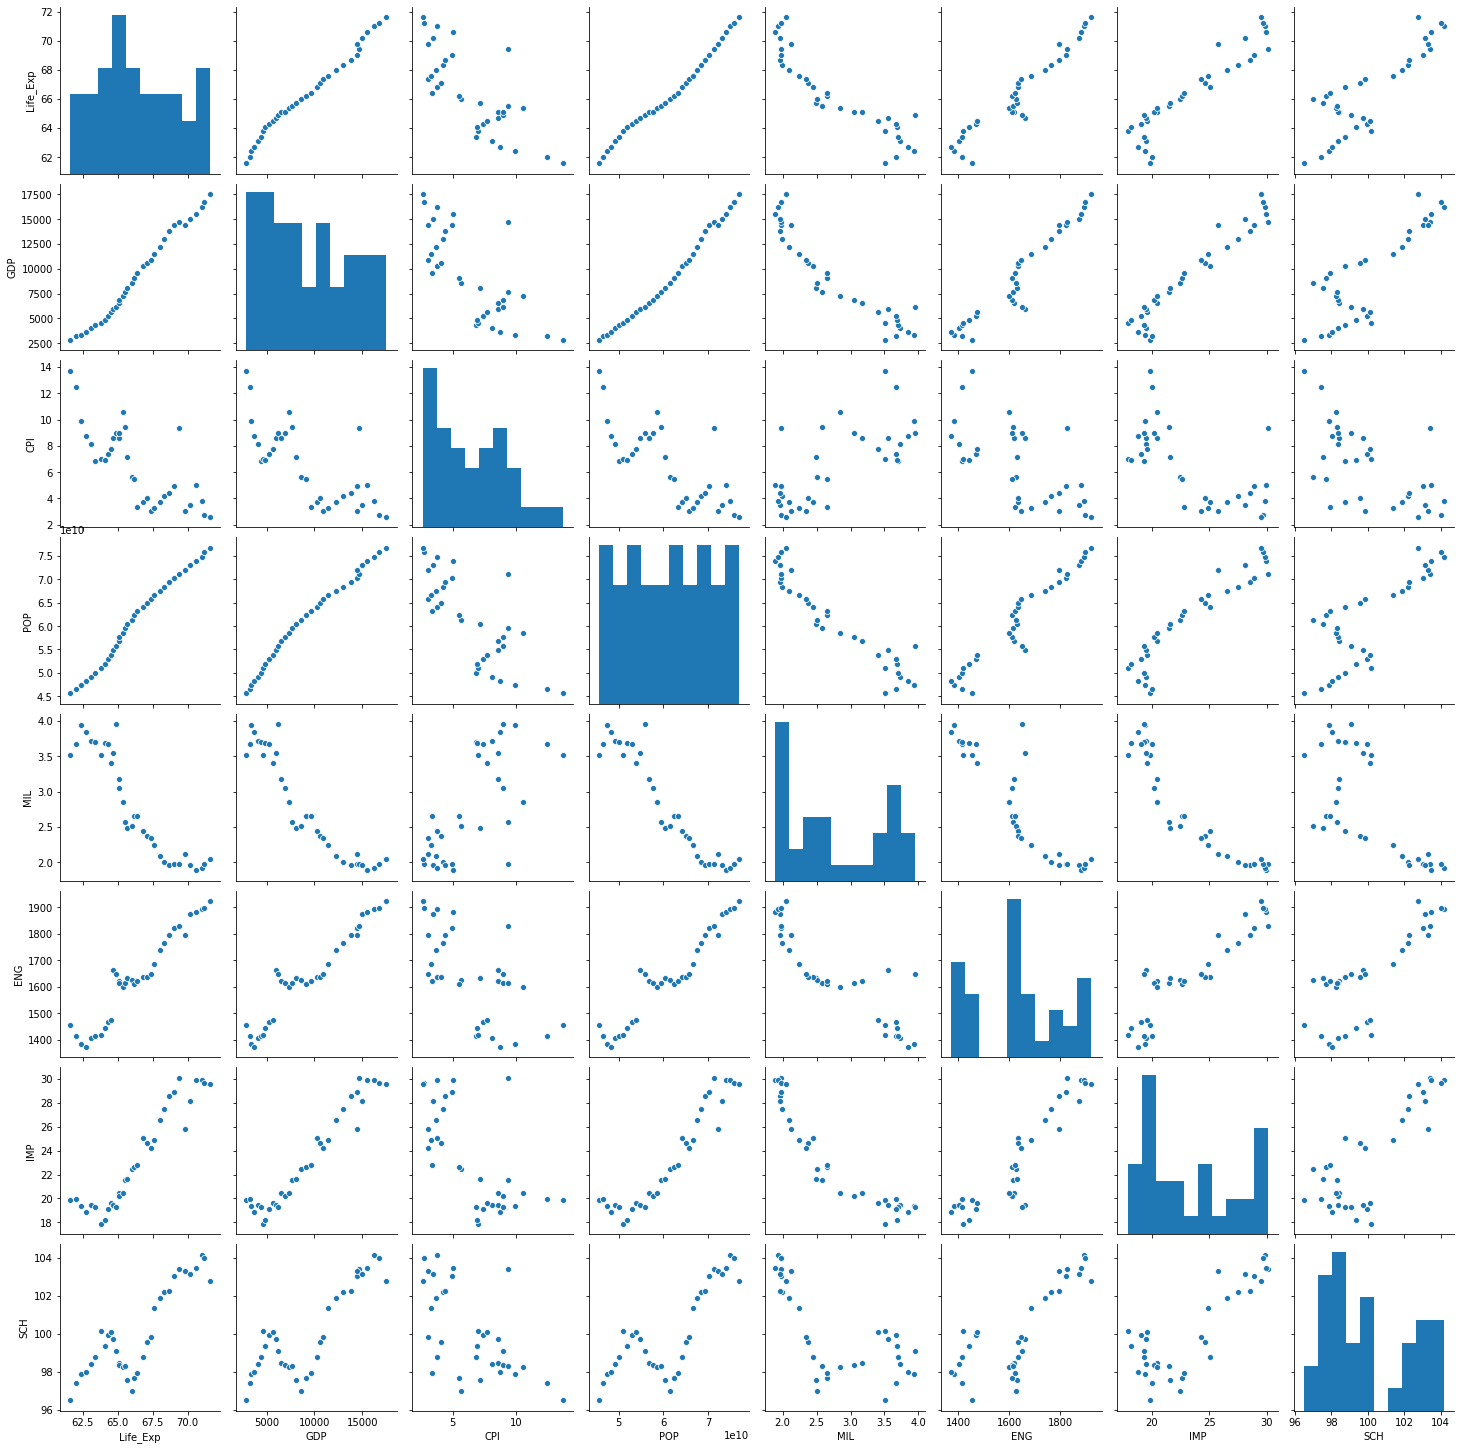

In [160]:
sns.pairplot(df_all.iloc[:, 1:len(df_all)-1]);

In [161]:
import statsmodels.api as sm

In [162]:
X = sm.add_constant(df_all[['GDP', 'CPI','POP', 'MIL', 'ENG', 'IMP', 'SCH']].values)
Y = df_all['Life_Exp']

model_1 = sm.OLS(Y, X, missing='drop').fit()

model_1.summary(xname=['constant', 'GDP', 'CPI','POP', 'MIL', 'ENG', 'IMP', 'SCH'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Life_Exp   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1302.
Date:                Sun, 16 Aug 2020   Prob (F-statistic):           1.92e-32
Time:                        23:29:36   Log-Likelihood:                 16.628
No. Observations:                  35   AIC:                            -17.26
Df Residuals:                      27   BIC:                            -4.813
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      41.3244      4.816      8.580      0.000      31.442      51.207
GDP            0.0003      0.000      2.640      0.014    7.58e-05       0.001
CPI            0.0215      0.023      0.930      0.361      -0.026       0.069
POP         2.025e-10    5.3e-11      3.820      0.001    9.37e-11    3.11e-10
MIL            0.5246      0.176      2.982      0.006       0.164       0.886
ENG           -0.0004      0.001     -0.406      0.688      -0.002       0.002
IMP           -0.0947      0.050     -1.892      0.069      -0.197       0.008
SCH            0.1072      0.032      3.383      0.002       0.042       0.172
==============================================================================
Omnibus:                        0.269   Durbin-Watson:                   1.152
Prob(Omnibus):                  0.874   Jarque-Bera (JB):                0.458
Skew:                           0.112   Prob(JB):                        0.796
Kurtosis:                       2.487   Cond. No.                     1.03e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### <b>K) Analysis 1: From OLS Regression results, the T of the variables World GDP (2.64), World Population (3.82), World Military Expeniture (2.98) and School Enrollment Primary (3.83) are bigger than 2.1 as the P of those are less than 0.05, the Null Hypothesis are rejected. The factor for those variables are not null and they play a role in determining the Life Expectancy. But note that in case of the variable World Population, rather than contributing, it could be the other way around. That is rise of Life Expectancy contributes to the World Population. So we need further analysis.  </b>
### <b> The T of World Import (-1.89) is also close to -2.1 and the P of it is near to close to 0.05. Despite the value of T is still more than -2.1 and P more than 0.05, it is very close to become a determining a factor. </b>
#### <b>Adjusted R-squared (0.997) is very close to 1. The model with all data points can be considered as a better fit.</b>

### <b>Another note is the standard error is not very high which means there is relatively less spread in the sampling distribution. The standard error indicates the likely accuracy of the sample mean as compared with the population mean. The standard error decreases as the sample size increases and approaches the size of the population.</b>

In [163]:
df_all.iloc[:, 1:len(df_all)-1].corr()

,Life_Exp,GDP,CPI,POP,MIL,ENG,IMP,SCH
Life_Exp,1.000000,0.992779,-0.768956,0.992199,-0.911604,0.959878,0.936980,0.857209
GDP,0.992779,1.000000,-0.755603,0.991497,-0.934291,0.957813,0.967140,0.848091
CPI,-0.768956,-0.755603,1.000000,-0.776531,0.703897,-0.633334,-0.658130,-0.612991
POP,0.992199,0.991497,-0.776531,1.000000,-0.945102,0.960449,0.938062,0.805827
MIL,-0.911604,-0.934291,0.703897,-0.945102,1.000000,-0.886811,-0.921307,-0.689495
ENG,0.959878,0.957813,-0.633334,0.960449,-0.886811,1.000000,0.914925,0.798580
IMP,0.936980,0.967140,-0.658130,0.938062,-0.921307,0.914925,1.000000,0.825294
SCH,0.857209,0.848091,-0.612991,0.805827,-0.689495,0.798580,0.825294,1.000000


### <b>L) Analysis 2: From the correlation matrix, the values of the variables World GDP (0.99), World Population (0.99), Energy Use per capita (0.95), World Imports (0.93) are close to 1, followed by that of World School Enrollment (0.86). They have a direct relationship with rise of Life Expectacy. The value of the variables World Military Expenditure (-0.91) followed by distanced World CPI (-0.76). We can see they have a reciprocal relationship with World Life Expectancy.</b>

### <b> Let's look at the Variance Inflation Factor.

In [164]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [165]:
range(df_all[['GDP', 'CPI','POP', 'MIL', 'ENG', 'IMP', 'SCH']].shape[1])

range(0, 7)

In [166]:
[variance_inflation_factor(df_all[['GDP', 'CPI','POP', 'MIL', 'ENG', 'IMP', 'SCH']].values, i) for i in range(df_all[['GDP', 'CPI','POP', 'MIL', 'ENG', 'IMP', 'SCH']].shape[1])]

[405.94759872871515,
 32.10098269300482,
 4936.329351563825,
 277.20753820219113,
 2674.9649247338953,
 916.0771624881929,
 4462.333729862939]

### <b>M) Analysis 3: We see all of them with a score greater than 3 so we know we have issues pertaining to multicollinearity. We remove the variable with the highest VIF score first and then rerun the test to confirm that the biggest contributor to multicollinearity is eliminated. Then we remove the next highest until we don't need to anymore.</b>

### <b>M1) Checking the VIF score again after removing the World Population variable POP...</b>

In [167]:
[variance_inflation_factor(df_all[['GDP', 'CPI', 'MIL', 'ENG', 'IMP', 'SCH']].values, i) for i in range(df_all[['GDP', 'CPI', 'MIL', 'ENG', 'IMP', 'SCH']].shape[1])]

[284.93927265509654,
 24.808252558637683,
 170.07449669217047,
 1462.3769757055172,
 792.9388807260726,
 2126.7396113622735]

### <b>M2) Checking the VIF score again after removing the World School Enrollment Primary variable SCH...</b>

In [168]:
[variance_inflation_factor(df_all[['GDP', 'CPI', 'MIL', 'ENG', 'IMP']].values, i) for i in range(df_all[['GDP', 'CPI', 'MIL', 'ENG', 'IMP']].shape[1])]

[199.25163119109195,
 19.418858407427823,
 107.09413806366847,
 570.09608455723,
 415.17730275069044]

### <b>M3) Checking the VIF score again after removing the World Energy Use per capita variable ENG...</b>

In [169]:
[variance_inflation_factor(df_all[['GDP', 'CPI', 'MIL', 'IMP']].values, i) for i in range(df_all[['GDP', 'CPI', 'MIL', 'IMP']].shape[1])]

[144.7439603181525, 17.4306584781592, 47.78113493543504, 343.83239336566555]

### <b>M4) Checking the VIF score again after removing the World Imports variable IMP...</b>

In [170]:
[variance_inflation_factor(df_all[['GDP', 'CPI', 'MIL']].values, i) for i in range(df_all[['GDP', 'CPI', 'MIL']].shape[1])]

[2.637542372104541, 12.485827172122422, 16.112920099245354]

## <b>N) Analysis 4: I don't feel dropping World School Enrollment because education could and do human educated, in returns getting to get employed, being more able to afford for better medical caring or access expensive medication or surgery procedures, and also better quality of living standard. They can contribute to rise of life expectancy in the long run. So will keep that in there.</b>
### <b> Dropping World Import is also reserved as when you import more, that means more people can afford the good. That may also imply people can also afford better medical care which in turns can relate to rising life expectacy. But for now, I will still drop it.</b>

In [171]:
df = df_all.copy()

In [172]:
df.drop(['Year','POP', 'ENG', 'IMP'], axis = 1, inplace = True)

In [173]:
df

,Life_Exp,GDP,CPI,MIL,SCH
20,61.6,2857.3,13.706322,3.512563,96.49219
21,62.0,3207.0,12.492528,3.672665,97.43032
22,62.4,3343.8,9.922729,3.939946,97.89526
23,62.7,3634.0,8.771147,3.847752,98.00871
24,63.1,4037.6,8.116398,3.722911,98.38321
25,63.4,4339.0,6.856812,3.698784,98.76827
26,63.8,4579.6,6.992774,3.511782,100.15600
27,64.1,4855.2,6.943306,3.682164,99.35571
28,64.3,5236.4,7.412766,3.677461,99.93194
29,64.5,5641.6,7.740886,3.398063,100.11790


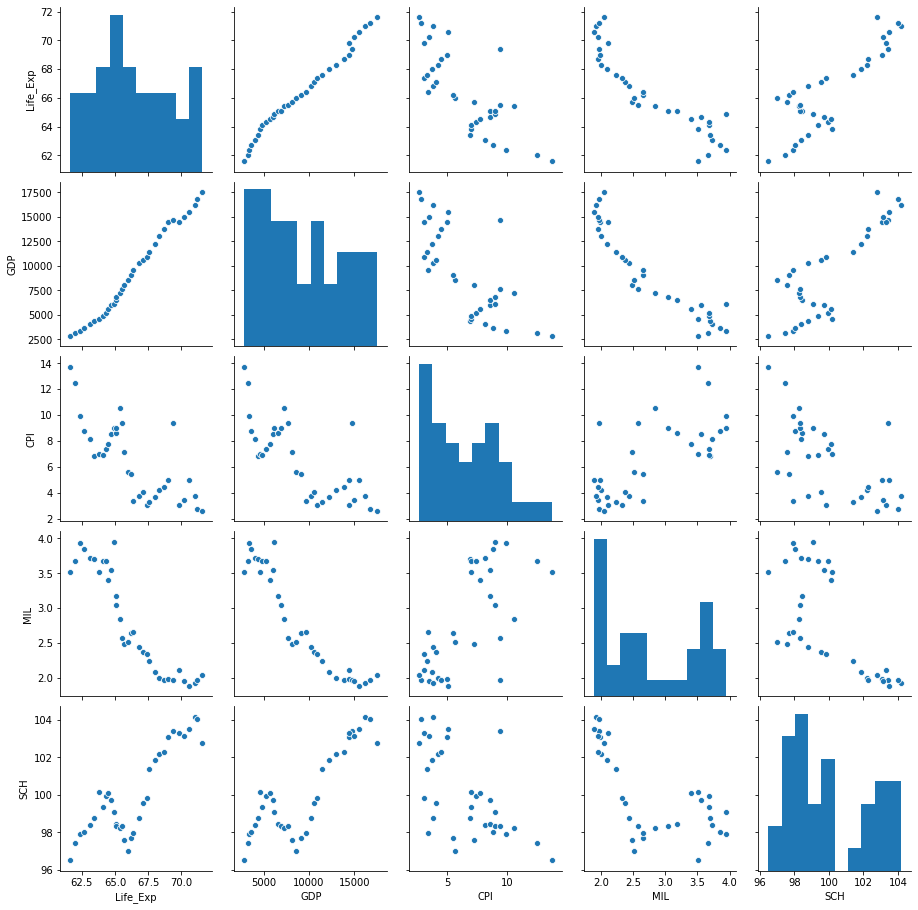

In [174]:
sns.pairplot(df);

### <b> Almost all variables don't exhibit normal distribution behavior. Let's check if log transformation helps.</b>

In [175]:
import numpy as np

In [176]:
df['log_Life_Exp'] = np.log(df.Life_Exp)
df['log_GDP'] = np.log(df.GDP)
df['log_CPI'] = np.log(df.CPI)
df['log_MIL'] = np.log(df.MIL)
df['log_SCH'] = np.log(df.SCH)

In [177]:
df.iloc[:, 5:len(df)-1]

,log_Life_Exp,log_GDP,log_CPI,log_MIL,log_SCH
20,4.120662,7.957632,2.617857,1.256346,4.569462
21,4.127134,8.073091,2.525131,1.300918,4.579137
22,4.133565,8.114863,2.294828,1.371167,4.583898
23,4.138361,8.198089,2.171468,1.347489,4.585056
24,4.144721,8.303406,2.093886,1.314506,4.588870
25,4.149464,8.375399,1.925243,1.308004,4.592776
26,4.155753,8.429367,1.944877,1.256123,4.606729
27,4.160444,8.487806,1.937778,1.303501,4.598706
28,4.163560,8.563390,2.003204,1.302223,4.604489
29,4.166665,8.637923,2.046516,1.223205,4.606348


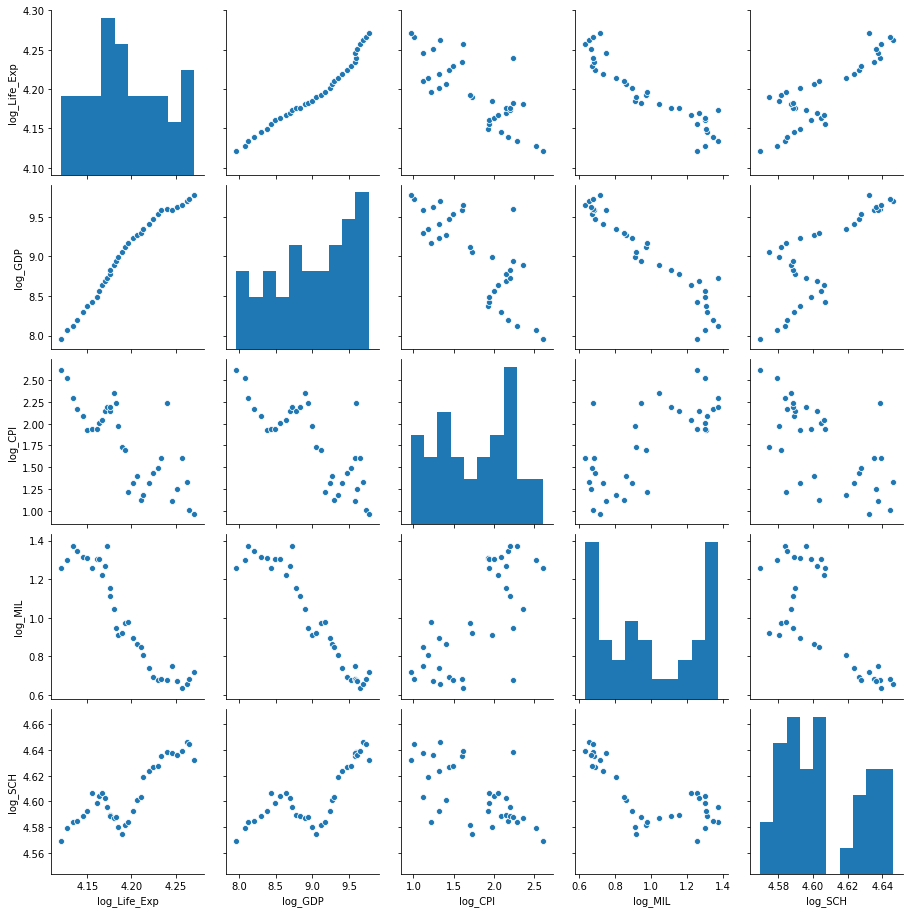

In [178]:
sns.pairplot(df.iloc[:, 5:len(df)-1])

### <b>O) Transforming them does not seem to do anything much. It does not seem to induce any kind of centrality for any of them. Well, let's continue to do analysis anyway.</b>

In [179]:
df

,Life_Exp,GDP,CPI,MIL,SCH,log_Life_Exp,log_GDP,log_CPI,log_MIL,log_SCH
20,61.6,2857.3,13.706322,3.512563,96.49219,4.120662,7.957632,2.617857,1.256346,4.569462
21,62.0,3207.0,12.492528,3.672665,97.43032,4.127134,8.073091,2.525131,1.300918,4.579137
22,62.4,3343.8,9.922729,3.939946,97.89526,4.133565,8.114863,2.294828,1.371167,4.583898
23,62.7,3634.0,8.771147,3.847752,98.00871,4.138361,8.198089,2.171468,1.347489,4.585056
24,63.1,4037.6,8.116398,3.722911,98.38321,4.144721,8.303406,2.093886,1.314506,4.588870
25,63.4,4339.0,6.856812,3.698784,98.76827,4.149464,8.375399,1.925243,1.308004,4.592776
26,63.8,4579.6,6.992774,3.511782,100.15600,4.155753,8.429367,1.944877,1.256123,4.606729
27,64.1,4855.2,6.943306,3.682164,99.35571,4.160444,8.487806,1.937778,1.303501,4.598706
28,64.3,5236.4,7.412766,3.677461,99.93194,4.163560,8.563390,2.003204,1.302223,4.604489
29,64.5,5641.6,7.740886,3.398063,100.11790,4.166665,8.637923,2.046516,1.223205,4.606348


In [180]:
X = sm.add_constant(df[['log_GDP', 'log_CPI', 'log_MIL', 'log_SCH']].values)
Y = df['log_Life_Exp']

model_2 = sm.OLS(Y, X).fit()

model_2.summary(xname=['constant', 'log_GDP', 'log_CPI', 'log_MIL', 'log_SCH'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_Life_Exp   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     411.1
Date:                Sun, 16 Aug 2020   Prob (F-statistic):           9.90e-26
Time:                        23:29:58   Log-Likelihood:                 132.04
No. Observations:                  35   AIC:                            -254.1
Df Residuals:                      30   BIC:                            -246.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       1.7684      0.316      5.595      0.000       1.123       2.414
log_GDP        0.0616      0.007      8.262      0.000       0.046       0.077
log_CPI       -0.0024      0.004     -0.655      0.517      -0.010       0.005
log_MIL        0.0001      0.013      0.011      0.991      -0.026       0.026
log_SCH        0.4073      0.072      5.675      0.000       0.261       0.554
==============================================================================
Omnibus:                        3.220   Durbin-Watson:                   0.294
Prob(Omnibus):                  0.200   Jarque-Bera (JB):                1.993
Skew:                           0.529   Prob(JB):                        0.369
Kurtosis:                       3.496   Cond. No.                     3.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## <b>P) The model is...

$$\Large log(Life_Expectancy) =  \beta_0 + \beta_1log(GDP) + \beta_2log(CPI) + \beta_3log(MIL) + \beta_4log(SCH) $$

### <b>Coefficient for log_GDP is 0.0616. That means a 10% increase in GPD may cause the Life Expectancy to increase by 0.0616%, all other factors remaining constant.</b>

### <b>Coefficient for log_CPI is -0.0024. That means a 10% increase in ir causes the price to decrease by 0.24%, all other factors remaining constant.</b>

In [181]:
df['predicted_price_model_1'] = model_1.predict()

In [182]:
df['predicted_price_model_2'] = np.exp(model_2.predict())

In [183]:
df

,Life_Exp,GDP,CPI,MIL,SCH,log_Life_Exp,log_GDP,log_CPI,log_MIL,log_SCH,predicted_price_model_1,predicted_price_model_2
20,61.6,2857.3,13.706322,3.512563,96.49219,4.120662,7.957632,2.617857,1.256346,4.569462,61.600117,61.164763
21,62.0,3207.0,12.492528,3.672665,97.43032,4.127134,8.073091,2.525131,1.300918,4.579137,62.051299,61.858435
22,62.4,3343.8,9.922729,3.939946,97.89526,4.133565,8.114863,2.294828,1.371167,4.583898,62.481102,62.172969
23,62.7,3634.0,8.771147,3.847752,98.00871,4.138361,8.198089,2.171468,1.347489,4.585056,62.754048,62.540053
24,63.1,4037.6,8.116398,3.722911,98.38321,4.144721,8.303406,2.093886,1.314506,4.588870,62.962809,63.056102
25,63.4,4339.0,6.856812,3.698784,98.76827,4.149464,8.375399,1.925243,1.308004,4.592776,63.260039,63.462579
26,63.8,4579.6,6.992774,3.511782,100.15600,4.155753,8.429367,1.944877,1.256123,4.606729,63.718723,64.033197
27,64.1,4855.2,6.943306,3.682164,99.35571,4.160444,8.487806,1.937778,1.303501,4.598706,63.969432,64.055838
28,64.3,5236.4,7.412766,3.677461,99.93194,4.163560,8.563390,2.003204,1.302223,4.604489,64.272924,64.496252
29,64.5,5641.6,7.740886,3.398063,100.11790,4.166665,8.637923,2.046516,1.223205,4.606348,64.438450,64.834485


In [184]:
from statsmodels.tools.eval_measures import rmse

In [185]:
rmse(df.Life_Exp, df.predicted_price_model_1)

0.15046529810961878

In [186]:
rmse(df.Life_Exp, df.predicted_price_model_2)

0.38293690058722785

### <b>Q) Both Root Mean Squared Error are smaller than 0.7, hence there is error between two data sets. However, the predicted value is far but not too far from the observed or known value. 

In [187]:
X = sm.add_constant(df[['log_GDP', 'log_CPI', 'log_MIL', 'log_SCH']].values)
Y = df['log_Life_Exp']

model_2 = sm.OLS(Y, X).fit()

model_2.summary(xname=['constant', 'log_GDP', 'log_CPI', 'log_MIL', 'log_SCH'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_Life_Exp   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     411.1
Date:                Sun, 16 Aug 2020   Prob (F-statistic):           9.90e-26
Time:                        23:29:59   Log-Likelihood:                 132.04
No. Observations:                  35   AIC:                            -254.1
Df Residuals:                      30   BIC:                            -246.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       1.7684      0.316      5.595      0.000       1.123       2.414
log_GDP        0.0616      0.007      8.262      0.000       0.046       0.077
log_CPI       -0.0024      0.004     -0.655      0.517      -0.010       0.005
log_MIL        0.0001      0.013      0.011      0.991      -0.026       0.026
log_SCH        0.4073      0.072      5.675      0.000       0.261       0.554
==============================================================================
Omnibus:                        3.220   Durbin-Watson:                   0.294
Prob(Omnibus):                  0.200   Jarque-Bera (JB):                1.993
Skew:                           0.529   Prob(JB):                        0.369
Kurtosis:                       3.496   Cond. No.                     3.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### <b>R) Analysis 5: According the error value, the predicted model does make a bit sense in some ways. GDP usually indicates the economy of a country. When the GDP is high, the countries produces more goods and there imply lots of economy activities, which in turns indicates the economy of that country is growing or strong; more people get employed; and when they have jobs, they are better off, meaning they earn and they can spend on goods, afford health care, improve the quality of living. They all in result contribute the higher life expectancy. When World GPD is better, it positively impacts the World Life Expectancy.

### <b>Analysis 6: Similarly, despite the magnitude or weight may be a bit too much, the variable School Enrollment, can contribute to the rise of world life expectancy. Though there just looks at the number from primary school enrollment, there can imply the overall school system in general since no countries will just build primary schools only. When people and more people get educated, they are more qualified for different kinds of jobs. As a result, more people are getting employed. In similar ways, more people can earn a living to become better off: they can afford health care, access medication or medical procedures which helps lower the fatality rate, which can directly contribute to the rise of life expectancy. </b> 

### <b>Analysis 7: The variable inflation or CPI contributes to the rise of Life Expectancy reciprocallly. Although there can be other economy parameters involved and related, simply put, if the inflation rate is lower, people may can afford more goods for the same amount of resources they have. Sure, stronger economy can lead people to earn more as they are more employment opportunities where they can get better pay, which in fact making people wealtier and better affordability of health care. Nevertheless, if everything remains constant, just to lower and higer inflation rate can affect how people spend and relate to how much they have avilable to spend on getting health treatment.</b> 

### <b>Analysis 8: Understandably, the World Military Expenditure may or may not contribute to the rise of Life Expectancy. Even though apparently, less military expenditure may indicate there could be less wars which can be a hugh factor of life expectany during early 1900's, countries can spend in military irrationally regardlessly. Nowadays lots of military spending are based on tensions escalated (more actual wars) or the egos to continue to the world leaders in terms of military strength. There are also spending lots of other retired expense. Hence, more or less military spending may not reflect the actual wellfare of citizens. In fact, in long run, that hurts the other wellfare spending. But other factors may outweigh the negative impact.</b> 

### <b>Analysis 9: There can be other profound factors or variables which can contribute to the rise of World Expectancy, e.g. advanced of medication, affordability of health care for all citizens, improved qualities of living due to advanced technology, governement policies, rise of awareness of other health parameters (emtional, mental) which all can contribute the health state of human beings, affecting the life expectancy. Nevertheless, there needs to gather more comprehensive datasets to quantify and justify the impact.</b> 

### <b>Analysis 10: In conclusion, in this study, we look at some variables which may contribute to the rise of World Expectancy. After gathering data, cleaning data, performing analysis, gathering models, there finds the variable World GDP and World School Enrollment Primary can have a direct relation with the rise of World Life Expectancy whereas the inflation CPI has a reciprocal relationship with World Life Reciporacl.</b> 

## <b> Data Resources: </b>

#### <b>Life Expectancy: https://data.worldbank.org/indicator/SP.DYN.LE00.IN </b>

#### <b> Population:https://data.worldbank.org/indicator/SP.POP.TOTL </b>

#### <b> GDP: https://www.bea.gov/data/gdp/gross-domestic-product#gdp </b>

#### <b> Inflation, Consumer Prices: https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG</b>

#### <b> Military Expenditure: https://data.worldbank.org/indicator/MS.MIL.XPND.GD.ZS</b>

#### <b> Energy Use per capita: https://databank.worldbank.org/reports.aspx?source=2&type=metadata&series=EG.USE.PCAP.KG.OE</b>
    
#### <b> World Import: https://databank.worldbank.org/reports.aspx?source=2&type=metadata&series=NE.IMP.GNFS.ZS#</b>

#### <b> School Enrollment: https://databank.worldbank.org/reports.aspx?source=2&type=metadata&series=SE.PRM.ENRR#</b>

#### <b>Comments: Time spent ~40hrs. </b>
#### <b>Time allocation: 80% on data gathering, cleaning. 12% on running models. 8% on analysis. </b>